In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0237

Best Fitness:	700.6385
Solution:	700.0000
Diff:		0.6385

[0:07:31][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9932

Best Fitness:	700.6713
Solution:	700.0000
Diff:		0.6713

[0:14:45][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9913

Best Fitness:	700.4527
Solution:	700.0000
Diff:		0.4527

[0:21:52][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0666

Best Fitness:	700.6785
Solution:	700.0000
Diff:		0.6785

[0:29:14][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0066

Best Fitness:	700.5938
Solution:	700.0000
Diff:		0.5938

[0:36:24][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1082

Best Fitness:	700.7946
Solution:	700.0000
Diff:		0.7946

[0:42:51][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0458

Best Fitness:	700.7170
Solution:	700.0000
Diff:		0.7170

[0:48:58][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0255

Best Fitness:	700.5351
Solution:	700.0000
Diff:		0.5351

[0:55:04][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0350

Best Fitness:	700.7754
Solution:	700.0000
Diff:		0.7754

[1:01:04][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9747

Best Fitness:	700.5943
Solution:	700.0000
Diff:		0.5943

[1:07:19][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1018

Best Fitness:	700.8513
Solution:	700.0000
Diff:		0.8513

[1:13:14][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0171

Best Fitness:	700.6777
Solution:	700.0000
Diff:		0.6777

[1:19:02][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9647

Best Fitness:	700.5985
Solution:	700.0000
Diff:		0.5985

[1:24:55][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0633

Best Fitness:	700.8518
Solution:	700.0000
Diff:		0.8518

[1:31:07][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0913

Best Fitness:	700.7259
Solution:	700.0000
Diff:		0.7259

[1:36:45][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9835

Best Fitness:	700.6477
Solution:	700.0000
Diff:		0.6477

[1:42:02][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0029

Best Fitness:	700.7475
Solution:	700.0000
Diff:		0.7475

[1:47:22][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9771

Best Fitness:	700.5706
Solution:	700.0000
Diff:		0.5706

[1:52:18][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0135

Best Fitness:	700.5267
Solution:	700.0000
Diff:		0.5267

[1:57:25][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0269

Best Fitness:	700.6683
Solution:	700.0000
Diff:		0.6683

[2:02:38][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9900

Best Fitness:	700.5749
Solution:	700.0000
Diff:		0.5749

[2:07:52][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1418

Best Fitness:	700.7539
Solution:	700.0000
Diff:		0.7539

[2:13:09][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1596

Best Fitness:	700.8835
Solution:	700.0000
Diff:		0.8835

[2:18:33][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0293

Best Fitness:	700.7204
Solution:	700.0000
Diff:		0.7204

[2:23:27][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0564

Best Fitness:	700.7309
Solution:	700.0000
Diff:		0.7309

[2:28:11][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9969

Best Fitness:	700.3734
Solution:	700.0000
Diff:		0.3734

[2:32:43][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0791

Best Fitness:	700.7455
Solution:	700.0000
Diff:		0.7455

[2:37:20][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9874

Best Fitness:	700.5373
Solution:	700.0000
Diff:		0.5373

[2:41:55][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0572

Best Fitness:	700.6368
Solution:	700.0000
Diff:		0.6368

[2:46:25][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1338

Best Fitness:	700.8620
Solution:	700.0000
Diff:		0.8620

[2:51:05][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0583

Best Fitness:	700.6820
Solution:	700.0000
Diff:		0.6820

[2:55:40][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0371

Best Fitness:	700.6578
Solution:	700.0000
Diff:		0.6578

[3:00:08][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0551

Best Fitness:	700.8049
Solution:	700.0000
Diff:		0.8049

[3:04:48][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0183

Best Fitness:	700.6598
Solution:	700.0000
Diff:		0.6598

[3:08:57][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9936

Best Fitness:	700.5834
Solution:	700.0000
Diff:		0.5834

[3:12:52][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9783

Best Fitness:	700.5680
Solution:	700.0000
Diff:		0.5680

[3:16:50][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.1360

Best Fitness:	700.8049
Solution:	700.0000
Diff:		0.8049

[3:20:42][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9597

Best Fitness:	700.4021
Solution:	700.0000
Diff:		0.4021

[3:24:33][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9967

Best Fitness:	700.5230
Solution:	700.0000
Diff:		0.5230

[3:28:29][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0449

Best Fitness:	700.8085
Solution:	700.0000
Diff:		0.8085

[3:32:21][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0175

Best Fitness:	700.6400
Solution:	700.0000
Diff:		0.6400

[3:36:14][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9362

Best Fitness:	700.5156
Solution:	700.0000
Diff:		0.5156

[3:40:09][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0119

Best Fitness:	700.5765
Solution:	700.0000
Diff:		0.5765

[3:43:39][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0489

Best Fitness:	700.7279
Solution:	700.0000
Diff:		0.7279

[3:46:55][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	700.9898

Best Fitness:	700.6423
Solution:	700.0000
Diff:		0.6423

[3:50:17][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0743

Best Fitness:	700.7912
Solution:	700.0000
Diff:		0.7912

[3:53:31][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0615

Best Fitness:	700.7470
Solution:	700.0000
Diff:		0.7470

[3:56:44][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0220

Best Fitness:	700.5527
Solution:	700.0000
Diff:		0.5527

[3:59:59][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0284

Best Fitness:	700.6058
Solution:	700.0000
Diff:		0.6058

[4:03:15][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0145

Best Fitness:	700.4771
Solution:	700.0000
Diff:		0.4771

[4:06:29][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	701.0603

Best Fitness:	700.7360
Solution:	700.0000
Diff:		0.7360

[4:09:54][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:09:54

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,1.081362,1.04339,0.973825,1.04498,1.088551,1.085325,1.035687,0.982571,1.071871,1.099583,...,1.077434,1.040063,1.072192,1.107629,0.965796,0.965112,1.069982,1.053206,0.983642,50
194,1.081362,1.04339,0.973825,1.04498,1.088551,1.085325,1.035687,0.982571,1.071871,1.099583,...,1.077434,1.040063,1.072192,1.107629,0.965796,0.965112,1.069982,1.053206,0.983642,50
195,1.081362,1.04339,0.973825,1.04498,1.088551,1.085325,1.035687,0.982571,1.071871,1.099583,...,1.077434,1.040063,1.072192,1.107629,0.965796,0.965112,1.069982,1.053206,0.983642,50
196,1.081362,1.04339,0.973825,1.04498,1.088551,1.077197,1.035687,0.982571,1.071871,1.099583,...,1.077434,1.040063,1.072192,1.107629,0.965796,0.965112,1.069982,1.053206,0.983642,50
197,1.081362,1.04339,0.973825,1.04498,1.088551,1.077197,1.035687,0.982571,1.071871,1.099583,...,1.077434,1.040063,1.072192,1.107629,0.965796,0.965112,1.069982,1.053206,0.983642,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.6384991998481837

Best error for run 1: 0.671282845759265

Best error for run 2: 0.4526956472979009

Best error for run 3: 0.6784746692869703

Best error for run 4: 0.5937711318327956

Best error for run 5: 0.7945920841467569

Best error for run 6: 0.717034369181647

Best error for run 7: 0.5351449043845378

Best error for run 8: 0.7753955997411595

Best error for run 9: 0.5943096519844175

Best error for run 10: 0.851347755472375

Best error for run 11: 0.6776627847773398

Best error for run 12: 0.5984643414410584

Best error for run 13: 0.8518303341544424

Best error for run 14: 0.7259491896817281

Best error for run 15: 0.6477217929758581

Best error for run 16: 0.7475084640396972

Best error for run 17: 0.5705882973991265

Best error for run 18: 0.5267241287781417

Best error for run 19: 0.6682736279510664

Best error for run 20: 0.5748797189178276

Best error for run 21: 0.7539123057690631

Best error for run 22: 0.8834842413579054

Best error for run 23: 0.7204196290863365

Best error for run 24: 0.7308913261114185

Best error for run 25: 0.3734212713158058

Best error for run 26: 0.7455157822836327

Best error for run 27: 0.5372990694334021

Best error for run 28: 0.6367514475590497

Best error for run 29: 0.862012561231154

Best error for run 30: 0.6820198571049332

Best error for run 31: 0.6578221707841294

Best error for run 32: 0.8048591341746487

Best error for run 33: 0.659847575084882

Best error for run 34: 0.5834037503917671

Best error for run 35: 0.567980081122414

Best error for run 36: 0.8049409600690751

Best error for run 37: 0.40206579576681634

Best error for run 38: 0.5230463356389237

Best error for run 39: 0.8085375415728322

Best error for run 40: 0.6399552492242719

Best error for run 41: 0.515633578270581

Best error for run 42: 0.5765187638090765

Best error for run 43: 0.7279279047695582

Best error for run 44: 0.6422930116391399

Best error for run 45: 0.7912280775533418

Best error for run 46: 0.7469626676617054

Best error for run 47: 0.5526793174773275

Best error for run 48: 0.6057692411939115

Best error for run 49: 0.4771195715629801

Best error for run 50: 0.7359931599519314

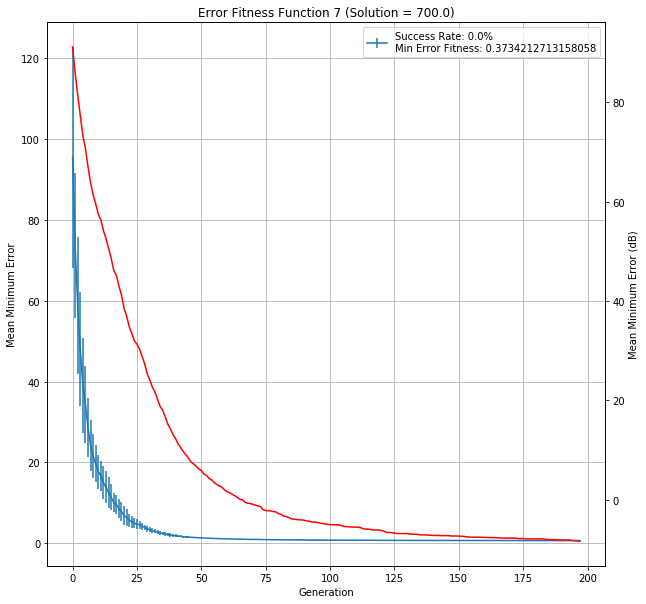

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.6,0.638499,0.671283,0.452696,0.678475,0.593771,0.794592,...,0.642293,0.791228,0.746963,0.552679,0.605769,0.47712,0.735993,0.659656,4:09:54,60000
